In [169]:
import pandas as pd
import numpy as np
import bokeh as bk
from scipy import stats as stats
from collections import Counter 
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show, output_file
from bokeh.models import LogColorMapper
from bokeh.palettes import Reds9 as palette
from bokeh.plotting import figure
from bokeh.sampledata.us_states import data as statesData
palette.reverse()

In [170]:
df1 = pd.read_csv("./golf_courses.csv",index_col=False,low_memory=False)
pd.set_option('display.max_columns', None)
to_drop = ['Fax',
           'Manager',
           'Club Pro',
           'Superintendent',
           'Shop Hours']
df1.drop(to_drop, inplace=True, axis=1)
df1.head()

,Name,Street,City,State,Zip1,Zip2,County,Email,Phone,Description,Public/Private,Year Built,Annual Rounds,Season,Guest Policy,Designer,Dress Code,Fee Weekend,Fee Weekday,Tee Time Reservations,Online Reservations,Earliest Tee Time,Holes,Greens Type,Fairway Type,Water Hazards,Bunkers,Metal Spikes,Aeration,Fivesomes Alloweed
0,Albertville Golf & Country Club,Country Club Rd,Albertville,AL,35950,NaN,Marshall,NaN,256-878-4403,NaN,Private,1966.0,NaN,Open all year,Closed,Leon Howard,"No denim, collared shirt and bermuda shorts re...",$20.00,$20.00,N/A N/A,NaN,NaN,18,Bermuda Grass,Bermuda Grass,Yes,21-30,Allowed,April October,No Overseeding
1,Willow Brook Golf Course,134 Par Dr,Albertville,AL,35951,6165.0,Marshall,ncagle@charter.net,256-878-6766,NaN,Public,1998.0,NaN,Open all year,Open,Neal Cagle,No tank tops or cutoffs,$20.00,$15.00,N/A N/A,NaN,NaN,18,Tifdwarf Grass,Bermuda Grass,Yes,1-10,Not Allowed,May,November/OpenDecember/Open
2,Lakewinds Golf Course,95 County Rd 40,Alexander City,AL,35010,3142.0,Tallapoosa,NaN,256-825-9860,NaN,Public,1966.0,"30,000 (estimated)",Open all year,Open,Willis Fuller,Shirt and shoes required,$10.00,$10.00,Accepted,No,7:30 AM,18,Bermuda Grass,Bermuda Grass,Yes,1-10,Not Allowed,Varies,October/Open
3,Willow Point Country Club,3054 Willow Point Rd,Alexander City,AL,35010,NaN,Tallapoosa,info@russelllands.com,256-212-1407,NaN,Private,1961.0,"25,000 (estimated)",Open all year,Closed,Michael Hurdzan & Dana Fry,"No denim, collared shirt and bermuda shorts re...",$101.00,$101.00,Accepted,No,8:00 AM,18,Bent Grass,Bermuda Grass,Yes,21-30,Allowed,May August,October/Open
4,Alpine Bay Golf Club,9855 Renfroe Rd,Alpine,AL,35014,6711.0,Talladega,NaN,256-268-2920,NaN,Resort,1972.0,"30,000 (estimated)",Open all year (closed on Mondays),Open,"Robert Trent Jones, Sr.","No denim, collared shirt and bermuda shorts re...",$34.00,$25.00,Accepted,No,8:00 AM,18,Bent Grass,Bermuda Grass,Yes,41-50,Not Allowed,March,September/Open


In [177]:
states = {
    code: state for code, state in statesData.items() 
}

del states['DC']
del states['AK']
del states['HI']

state_xs = [state["lons"] for state in states.values()]
state_ys = [state["lats"] for state in states.values()]
names =[code for code in states.keys()]

#redoing names and counts is necessary here because three states not included in the image are removed from the dataset

state = df1.State
count = Counter(state)
counts = [count[name] for name in names]

color_mapper = LogColorMapper(palette=palette)

data=dict(
    x=state_xs,
    y=state_ys,
     name=names,
     count = counts
)

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Distribution of Golf Courses in America", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,plot_width=1100, plot_height=700,
     tooltips=[
          ("Name", "@name"),("Golf Courses:", "@count")
     ])
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
           fill_color={'field': 'count', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

output_notebook()
show(p)

Loading BokehJS ...

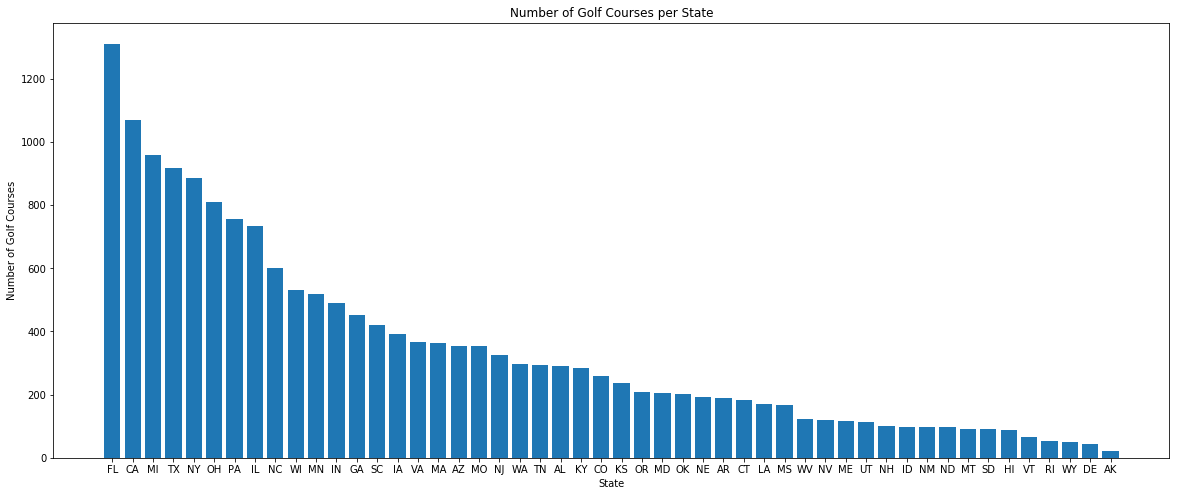

In [171]:
counts = [x for x in df1['State'].dropna().value_counts()]
names = [x for x in df1['State'].dropna().value_counts().index]
plt.figure(figsize =(20,8))
plt.bar(range(len(counts)), counts)
ax = plt.subplot()
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(names)
plt.xlabel('State')
plt.ylabel('Number of Golf Courses')
plt.title('Number of Golf Courses per State')
plt.show()

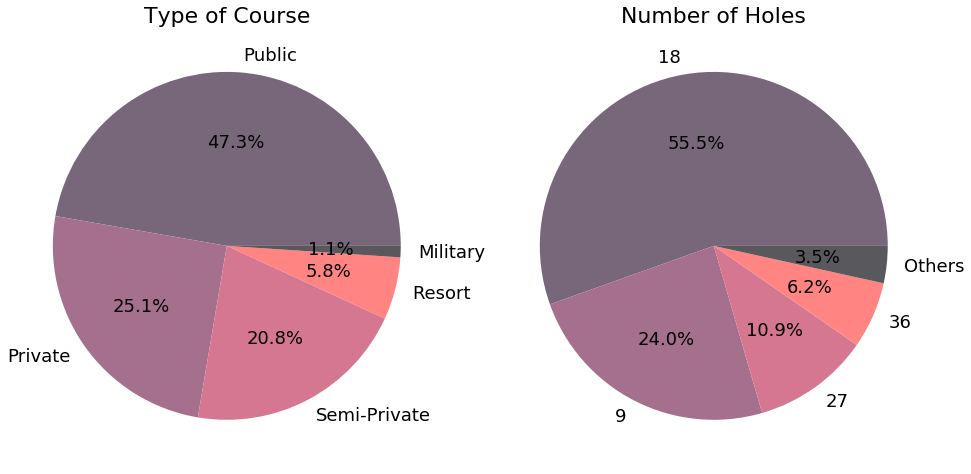

In [218]:
counts_p = [x for x in df1['Public/Private'].dropna().value_counts()]
names_p = [x for x in df1['Public/Private'].dropna().value_counts().index]

counts = [x for x in df1['Holes'].dropna().value_counts()]
holes = [x for x in df1['Holes'].dropna().value_counts().index]

#change limit to show different number of course sizes displayed in chart
limit = 4

if limit > 0 and limit < len(holes):
    others = sum(counts[limit:])
    holes = holes[0:limit]
    counts = counts [0:limit]

holes.append('Others')
counts.append(others)

plt.figure(figsize =(16,8))

ax1 = plt.subplot(1,2,1)
colors = ['#78667b','#a56f8e','#d57790', '#ff8482','#59585c']
ax1.axis('equal')
ax1.set_title('Type of Course',fontsize=22)
ax1.pie(counts_p,labels=names_p,autopct='%0.1f%%',colors=colors,textprops={'fontsize': 18})


ax2 = plt.subplot(1,2,2)
ax2.axis('equal')
ax2.set_title('Number of Holes',fontsize=22)
ax2.pie(counts,labels=holes,autopct='%0.1f%%',colors=colors,textprops={'fontsize': 18})
plt.show()

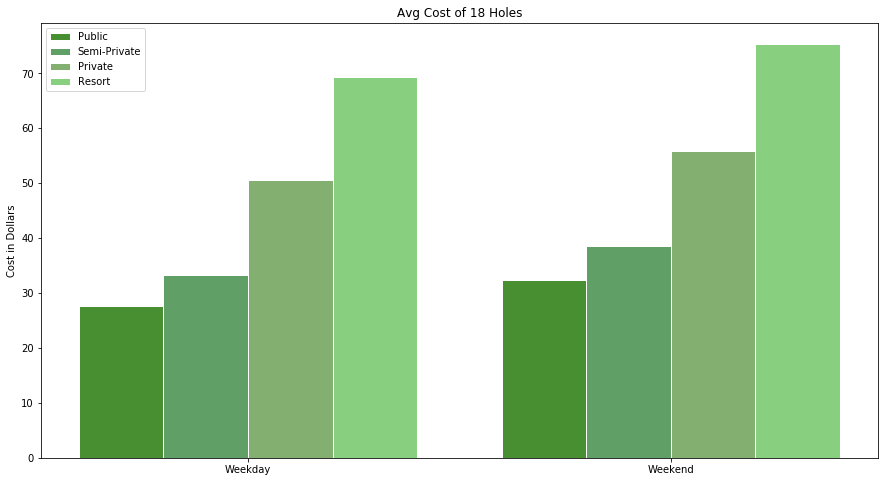

In [195]:
private = df1[(df1['Public/Private'] == 'Private') & (df1['Holes']==18)]
weekday_avg_pr = np.mean([float(x.strip('$')) for x in private['Fee Weekday'].dropna()])
weekend_avg_pr = np.mean([float(x.strip('$')) for x in private['Fee Weekend'].dropna()])

sprivate = df1[(df1['Public/Private'] == 'Semi-Private') & (df1['Holes']==18)]
weekday_avg_spr = np.mean([float(x.strip('$')) for x in sprivate['Fee Weekday'].dropna()])
weekend_avg_spr = np.mean([float(x.strip('$')) for x in sprivate['Fee Weekend'].dropna()])

public = df1[(df1['Public/Private'] == 'Public')  & (df1['Holes']==18)]
weekday_avg_pub = np.mean([float(x.strip('$')) for x in public['Fee Weekday'].dropna()])
weekend_avg_pub = np.mean([float(x.strip('$')) for x in public['Fee Weekend'].dropna()])

resort = df1[(df1['Public/Private'] == 'Resort')  & (df1['Holes']==18)]
weekday_avg_r = np.mean([float(x.strip('$')) for x in resort['Fee Weekday'].dropna()])
weekend_avg_r = np.mean([float(x.strip('$')) for x in resort['Fee Weekend'].dropna()])
# set width of bar
barWidth = 0.2
plt.figure(figsize =(,8)) 
# set height of bar
bars1 = [weekday_avg_pub, weekend_avg_pub]
bars2 = [weekday_avg_spr, weekend_avg_spr]
bars3 = [weekday_avg_pr, weekend_avg_pr]
bars4 = [weekday_avg_r, weekend_avg_r]
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
# Make the plot
plt.bar(r1, bars1, color='#488f31', width=barWidth, edgecolor='white', label='Public')
plt.bar(r2, bars2, color='#609f65', width=barWidth, edgecolor='white', label='Semi-Private')
plt.bar(r3, bars3, color='#83af70', width=barWidth, edgecolor='white', label='Private')
plt.bar(r4, bars4, color='#88cf80', width=barWidth, edgecolor='white', label='Resort')
# Add xticks on the middle of the group bars
plt.ylabel('Cost in Dollars')
plt.xticks([r  + (barWidth*1.5) for r in range(len(bars1))], ['Weekday', 'Weekend'])
 
# Create legend & Show graphic
plt.title("Avg Cost of 18 Holes")
plt.legend()
plt.show()



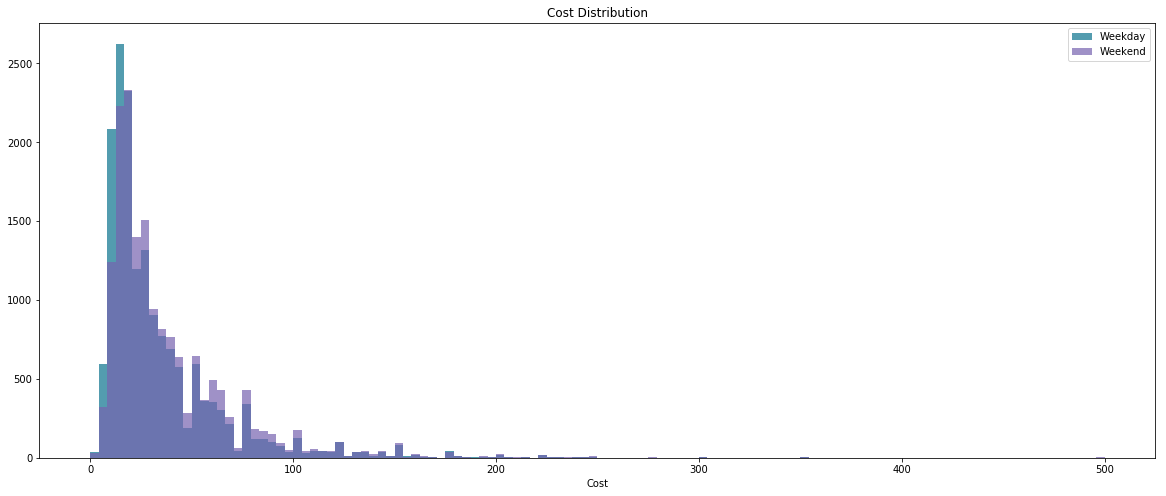

In [174]:
plt.figure(figsize =(20,8))
bin_size = 120

data_weekday = [int(x[1:len(x)-3]) for x in df1['Fee Weekday'].dropna()]
data_weekend = [int(x[1:len(x)-3]) for x in df1['Fee Weekend'].dropna()]
color_1 = "#7663b0"
color_2 = "#539caf"


plt.hist(data_weekday, bins=bin_size, color=color_2, alpha =1, label="Weekday")
plt.hist(data_weekend, bins=bins, color=color_1, alpha =., label="Weekend")


plt.title('Cost Distribution')
plt.xlabel('Cost')
plt.legend(loc = 'best')
plt.show()